<a href="https://colab.research.google.com/github/Sinrez/PythonProjects/blob/main/%D0%9E%D1%82%D0%B7%D1%8B%D0%B2%D1%8B_%D0%BF%D0%BE_%D0%BA%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%BD%D1%8B%D0%BC_%D0%BA%D0%B0%D1%80%D1%82%D0%B0%D0%BC_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('resp_cred_card_2023.csv', delimiter=';')
df.head(2)
#проверяем, что загрузилось

,id_url,url_page,bank_name,category,short_feedback,response_date,response_city,response_full
0,11141972,https://www.banki.ru/services/responses/bank/r...,Газпромбанк,creditcards,Меняют условия договора в одностороннем порядке!,2023-10-17 15:00:00.000000,Кострома (Костромская область),Всем добрый день!Получил в декабре 2022 года к...
1,11139688,https://www.banki.ru/services/responses/bank/r...,Банк «Открытие»,creditcards,Не закрыли карту в отведенный срок,2023-10-15 08:29:00.000000,Ростов-на-Дону (Ростовская область),28.08.23 подал заявление в отделении банка Отк...


Лидеры по кол-ву отзывов всего:

In [ ]:
bank_count = df['bank_name'].value_counts().sort_values(ascending=False)
bank_count

Альфа-Банк                                         849
Газпромбанк                                        538
Тинькофф Банк                                      443
МТС Банк                                           328
Банк «Открытие»                                    327
ВТБ                                                268
Сбербанк                                           233
Ренессанс Банк                                     190
Совкомбанк                                         186
Хоум Банк                                          181
Росбанк                                            150
ОТП Банк                                            93
Райффайзен Банк                                     68
Уральский банк реконструкции и развития (УБРиР)     65
Уралсиб                                             64
Почта Банк                                          54
Кредит Европа Банк                                  45
Банк ОЗОН                                           39
Азиатско-Т

Кол-во отзывов по регионам

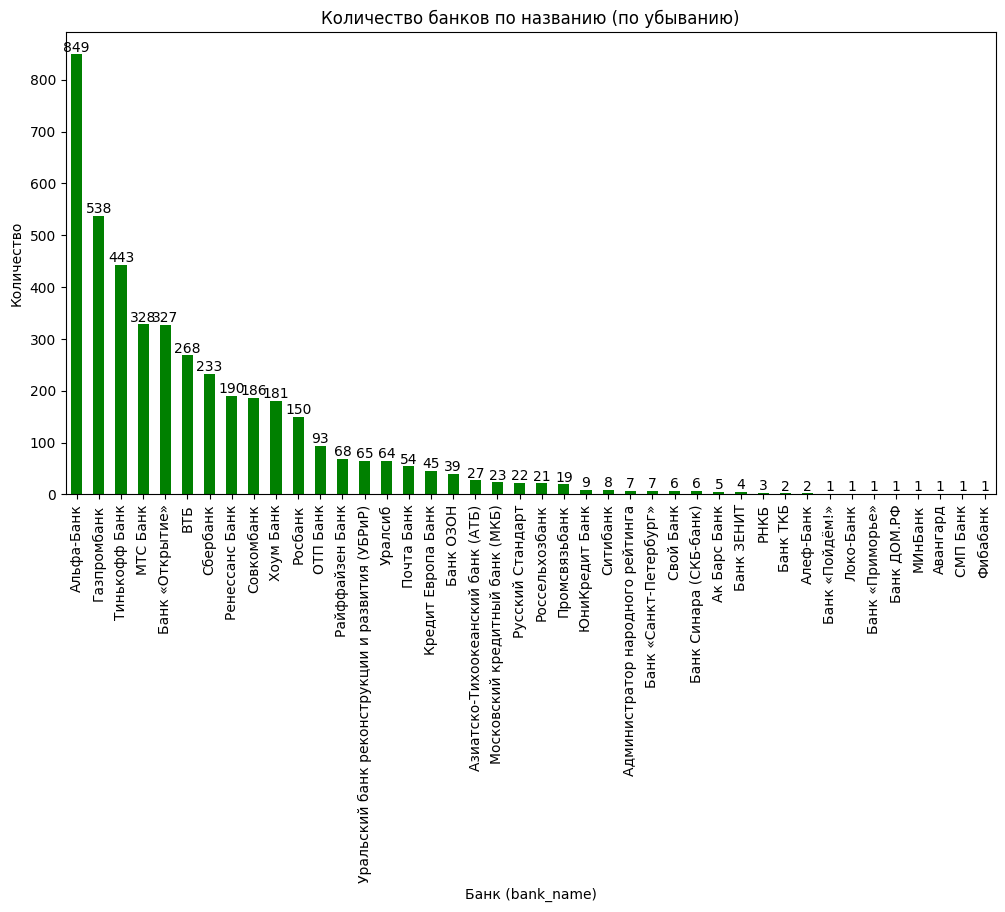

In [ ]:
# Визуализация данных в виде столбчатой диаграммы
plt.figure(figsize=(12, 6))
ax = bank_count.plot(kind='bar', color='green')
plt.title('Количество банков по названию (по убыванию)')
plt.xlabel('Банк (bank_name)')
plt.ylabel('Количество')

# Добавление подписей к столбцам
for i, v in enumerate(bank_count):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.xticks(rotation=90)  # Поворачиваем подписи на оси X для улучшения читаемости
plt.show()

Кол-во отзывов по городам

In [ ]:
# Группировка данных по полю 'response_city' и подсчет количества отзывов 'response_full' в каждой группе
city_review_count = df.groupby('response_city')['response_full'].count().sort_values(ascending=False)
city_review_count

response_city
Москва                                 1059
Санкт-Петербург                         444
Екатеринбург (Свердловская область)     128
Новосибирск (Новосибирская область)     101
Казань (Республика Татарстан)            96
                                       ... 
Лысьва (Пермский край)                    1
Льгов (Курская область)                   1
Магадан (Магаданская область)             1
Малоярославец (Калужская область)         1
Яшкино (Кемеровская область)              1
Name: response_full, Length: 367, dtype: int64

Отобразим на графике города с кол-вом отзывов более 30

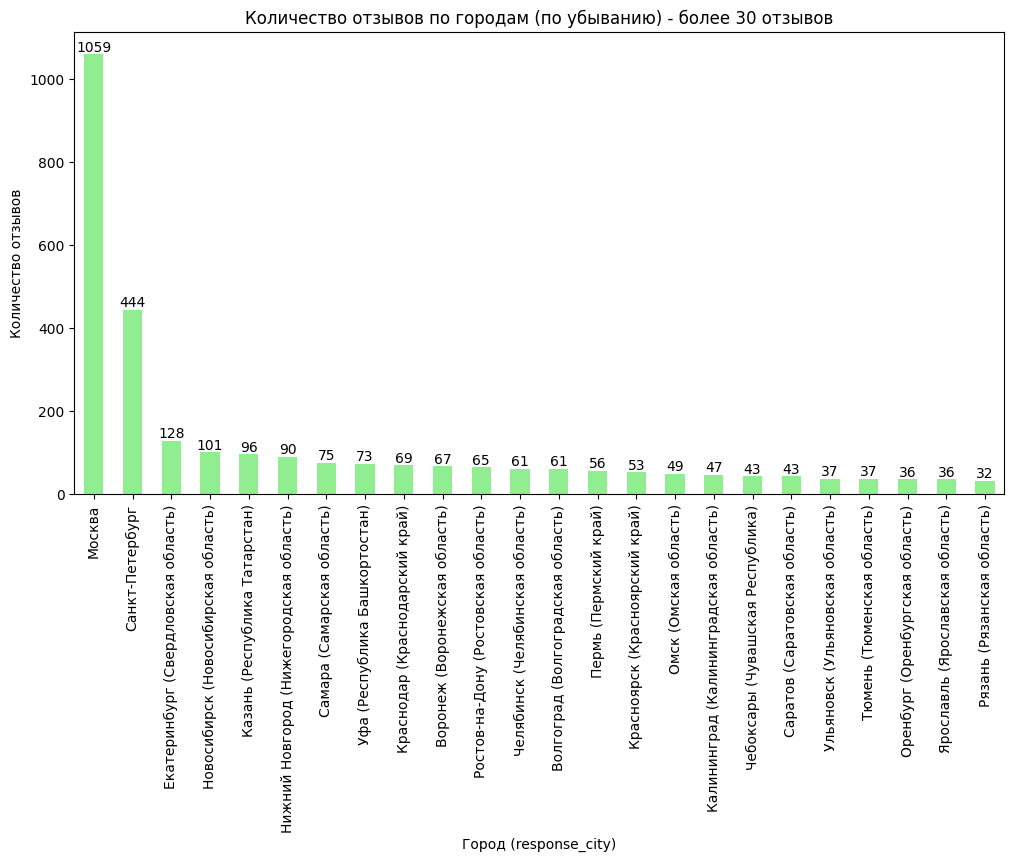

In [ ]:
# Фильтрация городов с количеством отзывов больше 30
city_review_count = city_review_count[city_review_count > 30]

# Визуализация данных в виде столбчатой диаграммы с подписями
plt.figure(figsize=(12, 6))
ax = city_review_count.plot(kind='bar', color='lightgreen')
plt.title('Количество отзывов по городам (по убыванию) - более 30 отзывов')
plt.xlabel('Город (response_city)')
plt.ylabel('Количество отзывов')
plt.xticks(rotation=90)  # Поворачиваем подписи на оси X для улучшения читаемости

# Добавление подписей к столбцам
for i, v in enumerate(city_review_count):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

Группировка банков по регионам, по кол-ву отзывов более 10

In [ ]:
# Группировка данных по регионам (response_city) и подсчет количества отзывов
city_review_count = df['response_city'].value_counts()

# Фильтрация городов с количеством отзывов больше 30
selected_cities = city_review_count[city_review_count > 30].index

# Фильтрация данных по отобранным городам
filtered_data = df[df['response_city'].isin(selected_cities)]

# Группировка данных в каждом городе и подсчет количества банков (bank_name) с отзывами более 30
bank_count_by_city = filtered_data.groupby('response_city')['bank_name'].value_counts()
bank_count_by_city = bank_count_by_city[bank_count_by_city > 10]
bank_count_by_city

response_city                            bank_name                        
Волгоград (Волгоградская область)        Газпромбанк                           13
                                         Альфа-Банк                            11
Воронеж (Воронежская область)            Совкомбанк                            14
Екатеринбург (Свердловская область)      Альфа-Банк                            22
                                         Тинькофф Банк                         22
                                         Банк «Открытие»                       15
                                         Газпромбанк                           12
Казань (Республика Татарстан)            Альфа-Банк                            22
                                         Газпромбанк                           17
                                         Банк «Открытие»                       11
                                         Тинькофф Банк                         11
Красноярск (Красноярски

Самые часто встречаемые слова в жалобах:

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
nltk.download('punkt')

# Загрузка данных из CSV-файла (замените 'ваш_файл.csv' на актуальный путь)
file_path = '/content/resp_cred_card_2023.csv'
df = pd.read_csv(file_path, delimiter=';')

# Предобработка текста
stop_words = set(stopwords.words('russian'))


# Слова, которые нужно исключить из анализа
excluded_words = ['банка', 'карту', 'банк', 'карты', 'это', 'дней', 'кредитную', 'кредитной', 'карта', 'день', 'вообще'
'хотя', 'карте','обращение', 'рублей', 'вопрос', 'ответ', 'нужно', 'просто', 'банке', 'банк','года', 'сказали',
                  'период','могу', 'банком','снова','месяц','всё', 'почему', 'ещё', 'офис','сразу','который'
                 'отделение','дня','информацию','хотя','вообще','вообще','несколько','сказал','сказали', 'сказала','2023',
                  'получил','получить','которые','обращения','горячую','данные','мной','заявление','моей','могут',
                  'ответа','сделать','также','оформить','поддержки','должен','пользоваться','решил','минут','её','говорят',
                  'сотрудников','клиентов','времени','деньги','время','сотрудник','итоге','который','очень','покупки',
                  'номер','сумма','кредитная','кредит','сегодня','ссылке', 'никто','мои','курьер','моего','течение','никаких',
                  'момент','сотрудника','следующий','буду', 'ситуации', 'кредитный','свои','этим', 'средств', 'пришло',
                 'ответили', 'которая','которую', 'Добрый','которой','горячей',  'банку','приходит', 'будут','2',
                  '3','5','1','2','4', 'месяца','10', '30', 'ждать','100', 'размере', 'говорит','должна' ,'именно','получила',
                  'связи','первый', 'год', 'либо','данной', 'написал','20','пор', 'каждый', '000', 'течении', 'денег','поэтому', 'января', 'апреля',
                  'якобы','работает','Однако','сих','ранее','руб','июля','августа','спустя','Добрый','итогу', 'мая','другого','сами', 'марта','стал',
                  'второй', 'такое','узнать','узнать','пишу','делать','июня','проблем', 'сколько','Далее','возможности','пока','Добрый',
                  'сначала','знаю','Однако','данный','невозможно','февраля','оказывается','Здравствуйте']

def preprocess_text(text):
    tokens = word_tokenize(text, language='russian')
    filtered_tokens = [word for word in tokens if word.isalnum() and word.lower() not in stop_words and word.lower() not in excluded_words]
    return filtered_tokens

df['preprocessed_response'] = df['response_full'].apply(preprocess_text)

# Сбор всех слов в один список
all_tokens = [token for tokens in df['preprocessed_response'] for token in tokens]

# Подсчет частоты слов
word_counts = Counter(all_tokens)

# Отображение 100 самых часто встречаемых слов
top_words = word_counts.most_common(100)
print(top_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('приложении', 1362), ('чат', 1309), ('чате', 1292), ('условия', 1267), ('акции', 1190), ('сумму', 1142), ('заявку', 1080), ('смс', 1038), ('закрыть', 1017), ('счет', 953), ('приложение', 925), ('проценты', 838), ('отделение', 783), ('картой', 781), ('лимит', 743), ('счета', 713), ('сотрудники', 713), ('оператор', 712), ('линию', 703), ('задолженность', 656), ('процентов', 645), ('задолженности', 588), ('льготный', 553), ('сайте', 548), ('договор', 543), ('линии', 498), ('клиента', 491), ('срок', 484), ('кредитку', 479), ('офисе', 470), ('договора', 469), ('обслуживание', 467), ('периода', 467), ('комиссии', 465), ('счёт', 461), ('клиентом', 451), ('услуги', 451), ('платеж', 451), ('Тинькофф', 450), ('отделении', 449), ('получения', 441), ('средства', 440), ('дебетовую', 438), ('МТС', 438), ('документы', 438), ('покупку', 437), ('ВТБ', 431), ('комиссию', 417), ('долг', 413), ('операции', 406), ('поддержку', 406), ('Альфа', 400), ('перевод', 396), ('Добрый', 392), ('комиссия', 385), ('

In [ ]:
pip install wordcloud

Самые часто встречаемые слова в жалобах - визуал

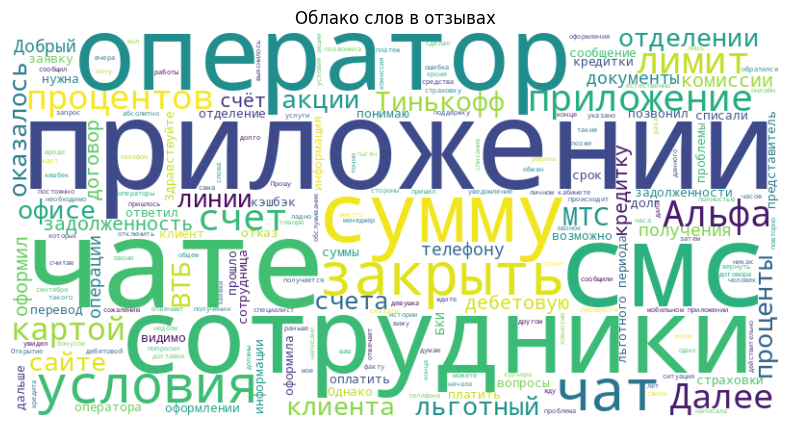

In [59]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Создание строки с текстом, объединяющей все слова
text = ' '.join(all_tokens)

# Генерация облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Визуализация облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов в отзывах')
plt.show()

Про рассрочки

In [76]:
import pandas as pd
import re

# Создайте функцию для подсчета отзывов с заданными словами
def count_reviews_with_keywords(text):
    keywords = ['рассрочка', 'рассрочки', 'рассрочке', 'рассрочку']
    for keyword in keywords:
        if re.search(keyword, text, flags=re.IGNORECASE):
            return 1
    return 0

# Примените функцию к полю response_full и создайте новый столбец 'count_reviews_with_keywords'
df['count_reviews_with_keywords'] = df['response_full'].apply(count_reviews_with_keywords)

# Подсчитайте количество отзывов с заданными словами
count = df['count_reviews_with_keywords'].sum()

print(f'Количество отзывов с ключевыми словами о {", " .join(keywords)}: {count}')


Количество отзывов с ключевыми словами о рассрочка, рассрочки, рассрочку, рассрочке: 161
